# Simple MNIST multiclass classification

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

from neuralnetlib.activations import Sigmoid, Softmax
from neuralnetlib.layers import Input, Dense, Activation
from neuralnetlib.losses import CategoricalCrossentropy
from neuralnetlib.model import Model
from neuralnetlib.optimizers import SGD
from neuralnetlib.preprocessing import one_hot_encode
from neuralnetlib.metrics import accuracy_score, f1_score, recall_score

## 1. Loading a dataset (in this case, MNIST)

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 2. Preprocessing

In [3]:
x_train = x_train.reshape(-1, 28 * 28) / 255.0  # Normalization and flattening of the images
x_test = x_test.reshape(-1, 28 * 28) / 255.0  # Normalization and flattening of the images
y_train = one_hot_encode(y_train, num_classes=10)  # One-hot encoding of the labels
y_test = one_hot_encode(y_test, num_classes=10)  # One-hot encoding of the labels

## 3. Model definition

In [ ]:
input_neurons = x_train.shape[1:][0]  # MNIST images are 28x28
num_hidden_layers = 2  # Number of hidden layers
hidden_neurons = 30  # Number of neurons in each hidden layer
output_neurons = 10  # Assuming 10 classes for MNIST

model = Model()
model.add(Input(input_neurons))
model.add(Dense(hidden_neurons, random_state=42))  # First hidden layer
model.add(Activation(Sigmoid()))  # ...and its function activation

for _ in range(num_hidden_layers - 1):  # Add the rest of the hidden layers
    model.add(Dense(hidden_neurons, random_state=42))  # Hidden layer must have the same number of neurons as the previous one
    model.add(Activation(Sigmoid()))  # ...and its function activation

model.add(Dense(output_neurons, random_state=42))  # Output layer
model.add(Activation(Softmax()))  # ...and its function activation

## 4. Model compilation

In [5]:
model.compile(loss_function=CategoricalCrossentropy(), optimizer=SGD(learning_rate=0.1))

model.summary()

Model
-------------------------------------------------
Layer 1: Input(input_shape=(784,))
Layer 2: Dense(units=30)
Layer 3: Activation(Sigmoid)
Layer 4: Dense(units=30)
Layer 5: Activation(Sigmoid)
Layer 6: Dense(units=10)
Layer 7: Activation(Softmax)
-------------------------------------------------
Loss function: CategoricalCrossentropy
Optimizer: SGD(learning_rate=0.1)
-------------------------------------------------


## 5. Model training

In [6]:
model.fit(x_train, y_train, epochs=10, batch_size=48, metrics=[accuracy_score], random_state=42)

[==============================] 100% Epoch 1/10 - loss: 0.5703 - accuracy: 0.8109 - 5.15s
[==============================] 100% Epoch 2/10 - loss: 0.2287 - accuracy: 0.9336 - 5.19s
[==============================] 100% Epoch 3/10 - loss: 0.1950 - accuracy: 0.9437 - 5.20s
[==============================] 100% Epoch 4/10 - loss: 0.1791 - accuracy: 0.9468 - 5.17s
[==============================] 100% Epoch 5/10 - loss: 0.1600 - accuracy: 0.9525 - 5.21s
[==============================] 100% Epoch 6/10 - loss: 0.1469 - accuracy: 0.9567 - 5.27s
[==============================] 100% Epoch 7/10 - loss: 0.1398 - accuracy: 0.9582 - 5.25s
[==============================] 100% Epoch 8/10 - loss: 0.1337 - accuracy: 0.9601 - 5.30s
[==============================] 100% Epoch 9/10 - loss: 0.1292 - accuracy: 0.9620 - 5.33s
[==============================] 100% Epoch 10/10 - loss: 0.1243 - accuracy: 0.9631 - 5.26s


## 6. Model evaluation

In [7]:
loss, _ = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

Test loss: 0.16876974058418312


## 7. Model prediction

In [8]:
y_pred = model.predict(x_test)

## 8. Printing some metrics

In [9]:
print("accuracy:", accuracy_score(y_pred, y_test))
print("f1_score:", f1_score(y_pred, y_test))
print("recall_score", recall_score(y_pred, y_test))

accuracy: 0.9551
f1_score: 0.9549572674105582
recall_score 0.9543577978545592


## 9. Plot the first 10 test images, their predicted labels, and the true labels.

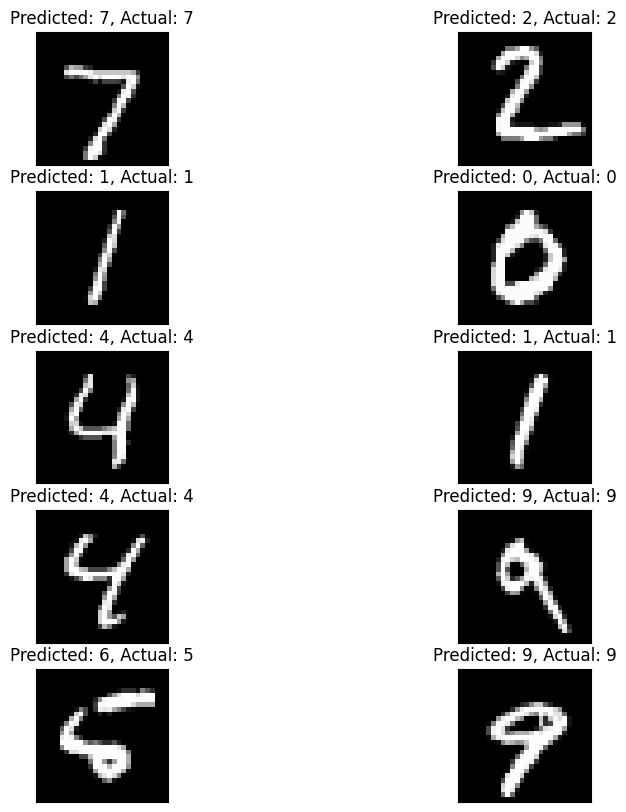

In [10]:
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    ax = fig.add_subplot(5, 2, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Predicted: {np.argmax(y_pred[i])}, Actual: {np.argmax(y_test[i])}")
plt.show()

## 10. Save the model

In [11]:
model.save("my_mnist_model.npz")